In [8]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5a4ab42b-8fe5-4958-8626-fca97efefd11',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-03-12T05:04:51.974Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9060}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10089, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [9]:
import pandas as pd


In [10]:
#This allows you to see all the columns, not just like 15
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [11]:
type(data)

dict

In [12]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10089,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.931504e+07,1.931504e+07,...,41.8339,4.336173e+11,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351
1,1027,Ethereum,ETH,ethereum,6569,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,19.0132,1.812662e+11,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351
2,825,Tether,USDT,tether,49144,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.211671e+10,7.314177e+10,...,7.6458,7.392877e+10,None,2023-03-12T05:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-12 05:04:39.868351
3,1839,BNB,BNB,bnb,1211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578928e+08,1.599800e+08,...,4.6333,4.476183e+10,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351
4,3408,USD Coin,USDC,usd-coin,10557,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.075119e+10,4.075119e+10,...,4.1762,3.981391e+10,None,2023-03-12T05:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-12 05:04:39.868351
5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,...,1.9597,3.667430e+10,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351
6,2010,Cardano,ADA,cardano,672,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.469516e+10,3.557370e+10,...,1.1219,1.387246e+10,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351
7,3890,Polygon,MATIC,polygon,608,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,...,0.9754,1.064715e+10,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351
8,74,Dogecoin,DOGE,dogecoin,655,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,0.9295,8.861427e+09,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351
9,4687,Binance USD,BUSD,binance-usd,6407,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,8.396421e+09,8.396421e+09,...,0.8859,8.445719e+09,None,2023-03-12T05:03:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-03-12 05:04:39.868351


In [13]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


In [14]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\user\AppData\Local\Temp\ipykernel_41632\2837807961.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [15]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10089,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.931504e+07,1.931504e+07,...,4.336173e+11,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
1,1027,Ethereum,ETH,ethereum,6569,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,1.812662e+11,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
2,825,Tether,USDT,tether,49144,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.211671e+10,7.314177e+10,...,7.392877e+10,None,2023-03-12T05:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-12 05:04:39.868351,NaT
3,1839,BNB,BNB,bnb,1211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578928e+08,1.599800e+08,...,4.476183e+10,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
4,3408,USD Coin,USDC,usd-coin,10557,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.075119e+10,4.075119e+10,...,3.981391e+10,None,2023-03-12T05:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-12 05:04:39.868351,NaT
5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,...,3.667430e+10,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
6,2010,Cardano,ADA,cardano,672,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.469516e+10,3.557370e+10,...,1.387246e+10,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
7,3890,Polygon,MATIC,polygon,608,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,...,1.064715e+10,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
8,74,Dogecoin,DOGE,dogecoin,655,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,8.861427e+09,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
9,4687,Binance USD,BUSD,binance-usd,6407,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,8.396421e+09,8.396421e+09,...,8.445719e+09,None,2023-03-12T05:03:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-03-12 05:04:39.868351,NaT


In [16]:
#scientific notation
#to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10089,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19315037.00000,19315037.00000,...,433617331483.14001,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
1,1027,Ethereum,ETH,ethereum,6569,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,...,181266175180.12000,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
2,825,Tether,USDT,tether,49144,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,72116708664.75655,73141766321.23428,...,73928771726.85001,None,2023-03-12T05:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-12 05:04:39.868351,NaT
3,1839,BNB,BNB,bnb,1211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157892802.21886,159979963.59043,...,44761834216.53000,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
4,3408,USD Coin,USDC,usd-coin,10557,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,40751188801.56055,40751188801.56055,...,39813911459.12000,None,2023-03-12T05:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-12 05:04:39.868351,NaT
5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,...,36674302003.53000,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
6,2010,Cardano,ADA,cardano,672,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34695162711.40900,35573698990.42300,...,13872455434.16000,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
7,3890,Polygon,MATIC,polygon,608,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,...,10647145357.75000,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
8,74,Dogecoin,DOGE,dogecoin,655,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,...,8861427057.33000,None,2023-03-12T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 05:04:39.868351,NaT
9,4687,Binance USD,BUSD,binance-usd,6407,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,8396420505.46338,8396420505.46338,...,8445719494.77000,None,2023-03-12T05:03:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2023-03-12 05:04:39.868351,NaT


In [17]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.10051,-0.18961,-8.01607,-5.22525,18.60749,21.93793
Ethereum,0.01936,1.19038,-5.70917,-3.69307,11.35979,18.86279
Tether,0.07525,-1.50943,1.06842,1.05286,1.06995,1.06828
BNB,0.17141,0.33713,-3.87819,-8.33746,1.83736,-0.74879
USD Coin,-0.81218,0.89254,-2.30530,-2.27731,-2.29179,-2.29316
XRP,-0.00382,-0.53702,-2.15154,-4.33570,0.22881,-2.06760
Cardano,-0.06083,-2.55515,-9.60307,-14.12337,-1.74685,1.60713
Polygon,0.43338,1.29959,-7.36163,-13.55705,25.17646,20.45086
Dogecoin,0.26794,0.59029,-11.80493,-18.09924,-12.65356,-23.90776


In [18]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h      0.10051
         quote.USD.percent_change_24h    -0.18961
         quote.USD.percent_change_7d     -8.01607
         quote.USD.percent_change_30d    -5.22525
         quote.USD.percent_change_60d    18.60749
                                           ...   
TRON     quote.USD.percent_change_24h     4.58966
         quote.USD.percent_change_7d    -11.59818
         quote.USD.percent_change_30d    -5.81572
         quote.USD.percent_change_60d     8.19386
         quote.USD.percent_change_90d    11.46318
Length: 90, dtype: float64

In [19]:
type(df4)

pandas.core.series.Series

In [20]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.10051
        quote.USD.percent_change_24h  -0.18961
        quote.USD.percent_change_7d   -8.01607
        quote.USD.percent_change_30d  -5.22525
        quote.USD.percent_change_60d  18.60749
...                                        ...
TRON    quote.USD.percent_change_24h   4.58966
        quote.USD.percent_change_7d  -11.59818
        quote.USD.percent_change_30d  -5.81572
        quote.USD.percent_change_60d   8.19386
        quote.USD.percent_change_90d  11.46318

[90 rows x 1 columns]

In [21]:
df5.count()

values    90
dtype: int64

In [22]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it
index = pd.Index(range(90))

In [24]:
# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.10051
1,Bitcoin,quote.USD.percent_change_24h,-0.18961
2,Bitcoin,quote.USD.percent_change_7d,-8.01607
3,Bitcoin,quote.USD.percent_change_30d,-5.22525
4,Bitcoin,quote.USD.percent_change_60d,18.60749
...,...,...,...
85,TRON,quote.USD.percent_change_24h,4.58966
86,TRON,quote.USD.percent_change_7d,-11.59818
87,TRON,quote.USD.percent_change_30d,-5.81572
88,TRON,quote.USD.percent_change_60d,8.19386


In [25]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.10051
1,Bitcoin,quote.USD.percent_change_24h,-0.18961
2,Bitcoin,quote.USD.percent_change_7d,-8.01607
3,Bitcoin,quote.USD.percent_change_30d,-5.22525
4,Bitcoin,quote.USD.percent_change_60d,18.60749
...,...,...,...
85,TRON,quote.USD.percent_change_24h,4.58966
86,TRON,quote.USD.percent_change_7d,-11.59818
87,TRON,quote.USD.percent_change_30d,-5.81572
88,TRON,quote.USD.percent_change_60d,8.19386


In [26]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.10051
1,Bitcoin,24h,-0.18961
2,Bitcoin,7d,-8.01607
3,Bitcoin,30d,-5.22525
4,Bitcoin,60d,18.60749
...,...,...,...
85,TRON,24h,4.58966
86,TRON,7d,-11.59818
87,TRON,30d,-5.81572
88,TRON,60d,8.19386


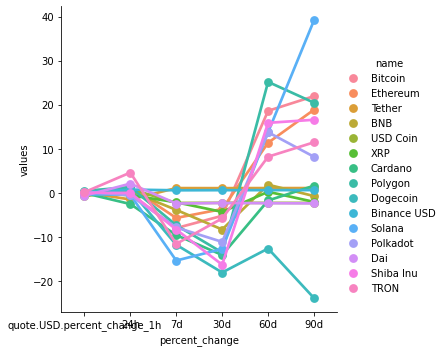

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [28]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,20648.44436,2023-03-12 05:04:39.868351
0,Bitcoin,20663.99273,NaT


In [1]:
#sns.set_theme(style="darkgrid")
#sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)